<a href="https://colab.research.google.com/github/MdRasel-Hossain/Data-Structure-and-Algorithm/blob/main/ML_09_10_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
hours= np.array([2,4,6,8,10]).reshape(-1,1)
marks = np.array([55, 60, 70, 80, 88])
hours, marks

(array([[ 2],
        [ 4],
        [ 6],
        [ 8],
        [10]]),
 array([55, 60, 70, 80, 88]))

In [4]:
marks

array([55, 60, 70, 80, 88])

In [5]:
hours

array([[ 2],
       [ 4],
       [ 6],
       [ 8],
       [10]])

In [6]:
model = LinearRegression()
model.fit(hours, marks)

LinearRegression()

In [7]:
print('M:', model.coef_[0])
print('c:', model.intercept_)

M: 4.3
c: 44.8


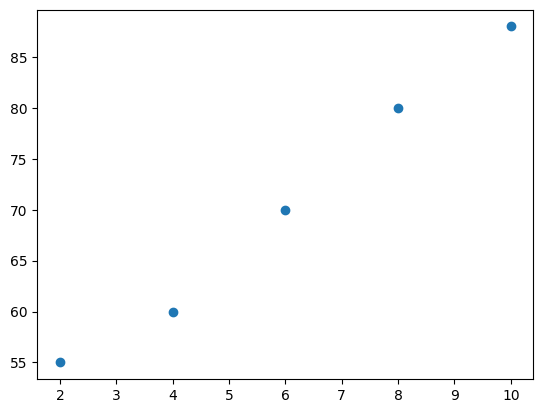

In [8]:
plt.scatter(hours, marks, label = 'Actual Data')

In [9]:
predicted_marks = model.predict(hours)

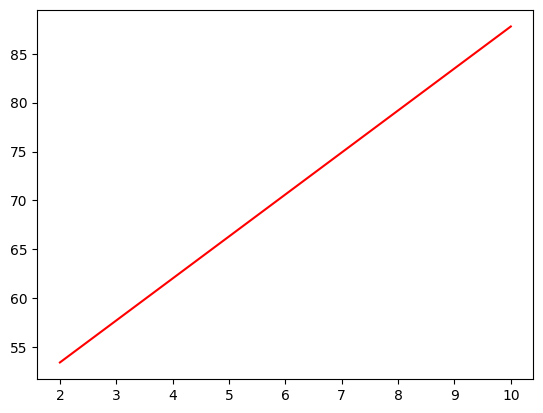

In [10]:
plt.plot(hours, predicted_marks, label = 'Best', color = 'r')

/tmp/ipython-input-627042887.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


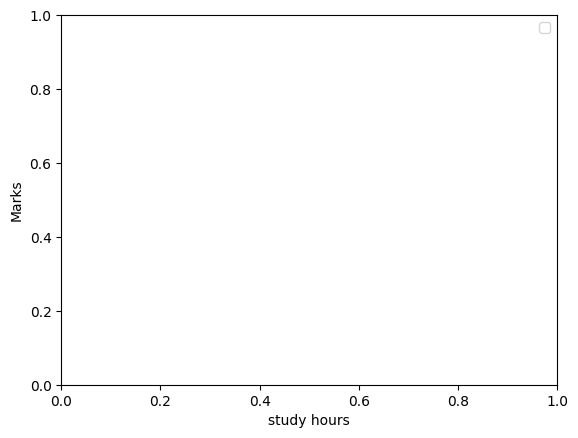

In [11]:
plt.xlabel('study hours')
plt.ylabel('Marks')
plt.legend()
plt.show()

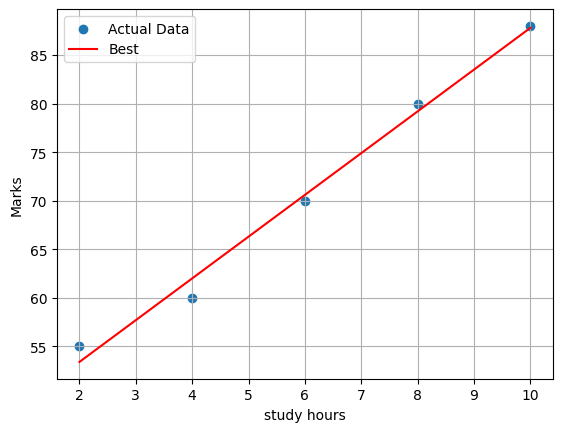

In [12]:
plt.scatter(hours, marks, label = 'Actual Data')
predicted_marks = model.predict(hours)
plt.plot(hours, predicted_marks, label = 'Best', color = 'r')
plt.xlabel('study hours')
plt.ylabel('Marks')
plt.grid()
plt.legend()
plt.show()


In [13]:
new_prediction = np.array([[7.5]])
prediction= model.predict(new_prediction)
print(prediction[0])

77.05


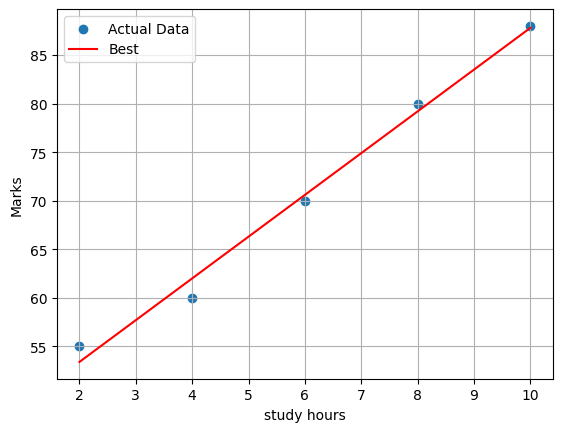

In [14]:
plt.scatter(hours, marks, label = 'Actual Data')
#predicted_marks = model.predict(hours)
plt.plot(hours, predicted_marks, label = 'Best', color = 'r')
predicted_marks = model.predict(hours)
plt.xlabel('study hours')
plt.ylabel('Marks')
plt.grid()
plt.legend()
plt.show()


In [15]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error

pred_marks= model.predict(hours)
mse_lin = mean_squared_error(marks, pred_marks)
print(mse_lin)

1.5200000000000033


In [16]:
sgd_reg = SGDRegressor(
    max_iter = 1000,
    learning_rate = 'invscaling',
    eta0 = 0.01,
    random_state = 2
)

sgd_reg.fit(hours, marks)
print(sgd_reg.coef_[0])
print(sgd_reg.intercept_[0])

5.6978326045092595
34.487830482493216


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [17]:
pred_sgd = sgd_reg.predict(hours)
mse_sgd = mean_squared_error(marks, pred_sgd)
print(mse_sgd)

20.85778243030823


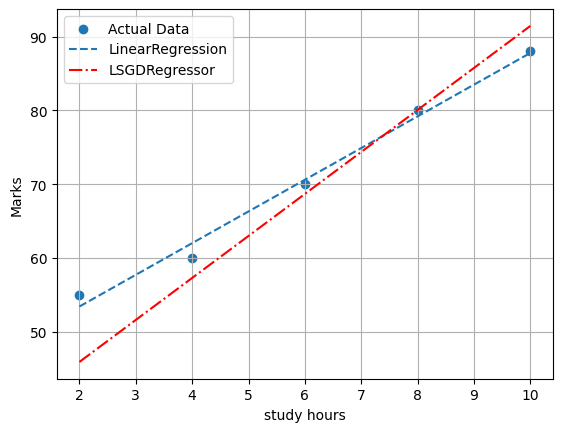

In [18]:
plt.scatter(hours, marks, label = 'Actual Data')

plt.plot(hours, pred_marks, label = 'LinearRegression', linestyle = '--')
plt.plot(hours, pred_sgd, label = 'LSGDRegressor', color = 'r', linestyle = '-.')
plt.xlabel('study hours')
plt.ylabel('Marks')
plt.grid()
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [20]:
pred = model.predict(hours)
print(pred)

[53.4 62.  70.6 79.2 87.8]


In [21]:
mae = mean_absolute_error(marks, pred)
mse = mean_squared_error(marks, pred)
rmse = np.sqrt(mse)
r2 = r2_score(marks, pred)
print(r2)

0.9898286937901499


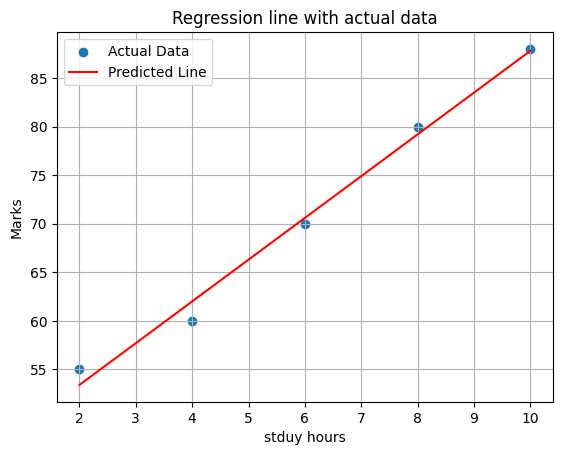

In [22]:
plt.scatter(hours, marks, label = 'Actual Data')
plt.plot(hours, pred, color = 'r', label = 'Predicted Line')

plt.xlabel('stduy hours')
plt.ylabel('Marks')
plt.title('Regression line with actual data')
plt.legend()
plt.grid(True)
plt.show()

### Decesion Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                            recall_score, f1_score, roc_curve, auc)

plt.rcParams['figure.figsize'] = (7, 5)

In [24]:
#Create a small synthetic dataset
import pandas as pd
data = {
    'Weather': ['Sunny', 'Rainy', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy'],
    'Windy':   [0,        1,       0,        1,        0,        1,        0,       1],
    'Play':    [1,        0,       1,        1,        0,        0,        1,       0]
}
df_synthetic = pd.DataFrame(data)
df_synthetic

,Weather,Windy,Play
0,Sunny,0,1
1,Rainy,1,0
2,Sunny,0,1
3,Sunny,1,1
4,Rainy,0,0
5,Rainy,1,0
6,Sunny,0,1
7,Rainy,1,0


In [25]:
#Encode categorical feature and prepare X, y
df_synthetic['Weather_num'] = df_synthetic['Weather'].map({'Sunny':1, 'Rainy':0})
X_syn = df_synthetic[['Weather_num','Windy']]
y_syn = df_synthetic['Play']
print(X_syn)
print(y_syn)


   Weather_num  Windy
0            1      0
1            0      1
2            1      0
3            1      1
4            0      0
5            0      1
6            1      0
7            0      1
0    1
1    0
2    1
3    1
4    0
5    0
6    1
7    0
Name: Play, dtype: int64


In [26]:
# Train a simple decesion Tree

tree_syn = DecisionTreeClassifier(max_depth = 3, random_state = 42)
tree_syn.fit(X_syn, y_syn)
tree_syn

DecisionTreeClassifier(max_depth=3, random_state=42)

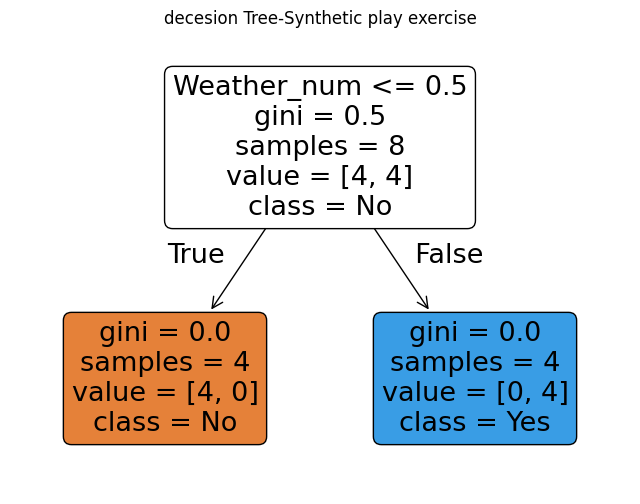

In [27]:
# Visualize Tree
plt.figure(figsize = (8,6))
plot_tree(tree_syn, feature_names =['Weather_num', 'Windy'],
          class_names= ['No', 'Yes'],
          filled = True,
          rounded = True,)
plt.title('decesion Tree-Synthetic play exercise')
plt.show()

In [28]:
example_1 = pd.DataFrame([[1,0]], columns = ['Weather_num', 'Windy'])
pred_1= tree_syn.predict(example_1)[0]
print('Sunny, not windy -> Play prediction: ', pred_1)


Sunny, not windy -> Play prediction:  1


In [29]:
from sklearn.datasets import make_classification

X_big, y_big = make_classification(n_samples =400,
                                   n_features= 5,
                                   n_informative = 3,
                                   n_redundant = 0,
                                   n_classes = 2,
                                   random_state = 42,
                                   )
X_train_big, X_test_big, y_train_big, y_test_big = train_test_split(X_big, y_big, test_size = 0.3, random_state = 2)
X_train_big.shape, X_test_big.shape

((280, 5), (120, 5))

In [35]:
#Train a deep tree vs a pruned tree
deep_tree = DecisionTreeClassifier(random_state=42)
deep_tree.fit(X_train_big, y_train_big)

pruned_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
pruned_tree.fit(X_train_big, y_train_big)

y_train_pred_deep = deep_tree.predict(X_train_big)
y_test_pred_deep = deep_tree.predict(X_test_big)

y_train_pred_pruned = pruned_tree.predict(X_train_big)
y_test_pred_pruned = pruned_tree.predict(X_test_big)

print('Deep tree – train accuracy:', round(accuracy_score(y_train_big, y_train_pred_deep), 3))
print('Deep tree – test accuracy :', round(accuracy_score(y_test_big, y_test_pred_deep), 3))
print()
print('Pruned tree – train accuracy:', round(accuracy_score(y_train_big, y_train_pred_pruned), 3))
print('Pruned tree – test accuracy :', round(accuracy_score(y_test_big, y_test_pred_pruned), 3))

Deep tree – train accuracy: 1.0
Deep tree – test accuracy : 0.867

Pruned tree – train accuracy: 0.921
Pruned tree – test accuracy : 0.883
